# 🧠 What is an Output Parser in LangChain?

An Output Parser is a tool that helps interpret and structure the raw output generated by a LLMs. It is used to convert the raw response from the LLM into a clean Python string — nothing fancy, just plain text.

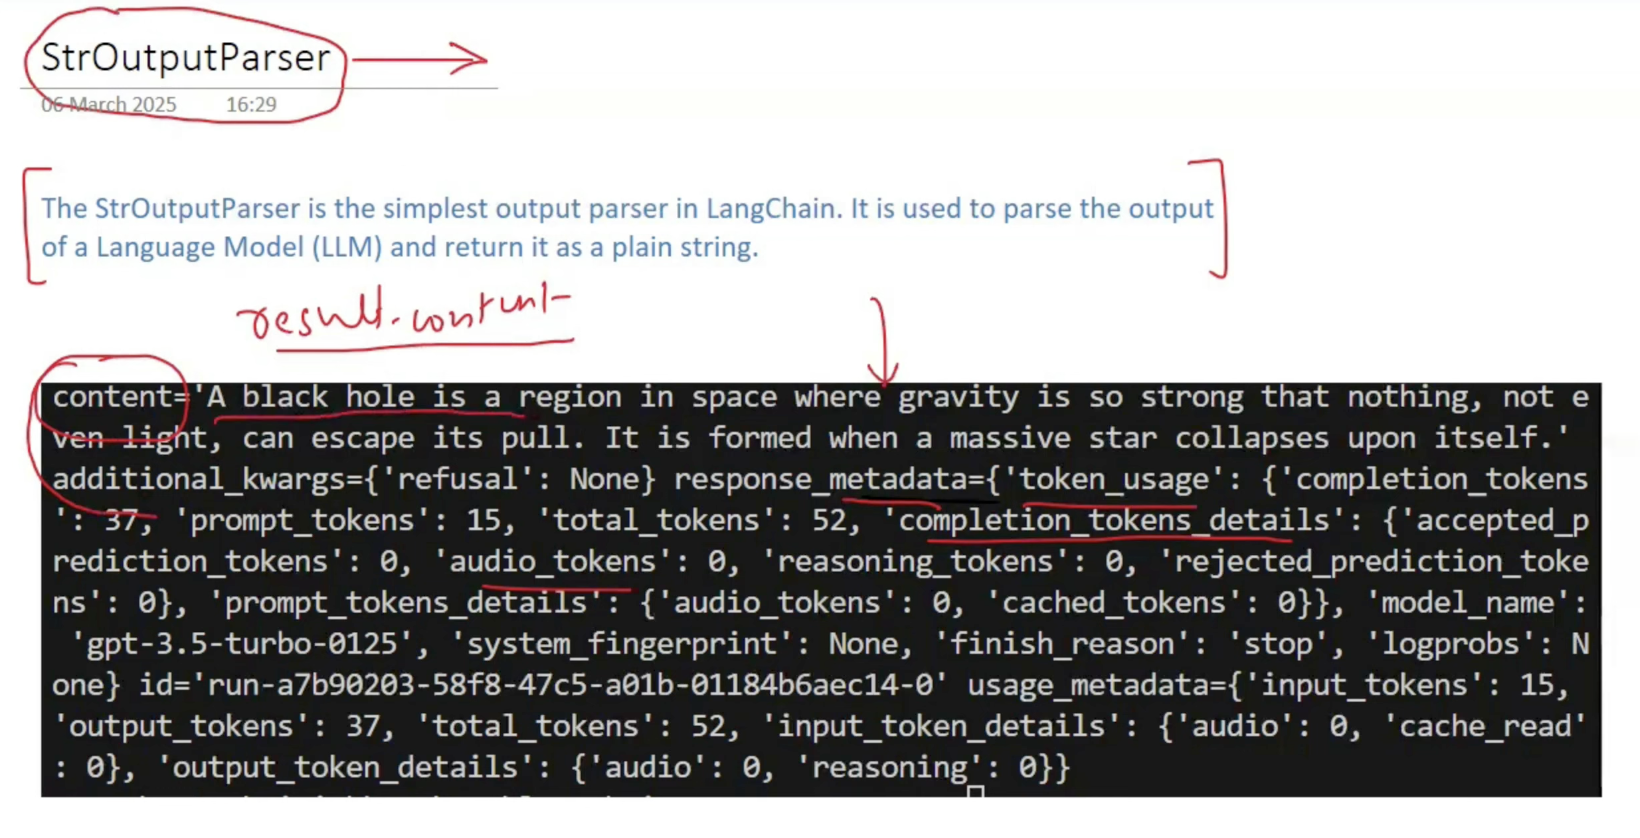

<h1 style="color:rgb(0, 7, 134);">1. Without String Output Parser</h1>

In [4]:
from langchain_ollama import OllamaLLM
from langchain_core.prompts import PromptTemplate

model = OllamaLLM(model="llama3.2")

# 1st Prompt -> Detailed Report
template1 = PromptTemplate(
    template = "Write a detailed report on the following topic: {topic}",
    input_variables = ["topic"]
)

# 2nd Prompt -> Summary
template2 = PromptTemplate(
    template = "Write a 5 line summary of the following report: \n {text}",
    input_variables = ["text"]
)

prompt1 = template1.invoke({"topic": "The impact of climate change on global agriculture"})
result1 = model.invoke(prompt1)

prompt2 = template2.invoke({"text": result1})
result2 = model.invoke(prompt2)

print("Detailed Report:\n", result1)
print("\nSummary:\n", result2)

Detailed Report:
 **The Impact of Climate Change on Global Agriculture**

Climate change is one of the most pressing issues of our time, with far-reaching consequences for ecosystems, economies, and human well-being. One of the most vulnerable sectors to climate change is agriculture, which provides food, income, and livelihoods for over 70% of the world's population. This report aims to provide a comprehensive overview of the impact of climate change on global agriculture, highlighting its effects, causes, and potential solutions.

**Causes of Climate Change in Agriculture**

Climate change is primarily caused by human activities such as burning fossil fuels, deforestation, and land-use changes. In agriculture, these factors lead to increased greenhouse gas emissions, particularly carbon dioxide (CO2) and methane (CH4). CO2 concentrations have risen from pre-industrial levels of around 280 parts per million (ppm) to over 415 ppm today, while CH4 levels have doubled since the Industria

<h1 style="color:rgb(0, 7, 134)">2. With String Output Parser</h1>

In [5]:
from langchain_ollama import OllamaLLM
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser

model = OllamaLLM(model="llama3.2")

# 1st Prompt -> Detailed Report
template1 = PromptTemplate(
    template = "Write a detailed report on the following topic: {topic}",
    input_variables = ["topic"]
)

# 2nd Prompt -> Summary
template2 = PromptTemplate(
    template = "Write a 5 line summary of the following report: \n {text}",
    input_variables = ["text"]
)

parser = StrOutputParser()

chain = template1 | model | parser | template2 | model | parser

result = chain.invoke({'topic':'black hole'})

print(result)

Here is a 5-line summary of the report:

Black holes are regions in space where gravity is so strong that nothing, including light, can escape. They are formed when massive stars collapse under their own gravity, creating a singularity at their center. Black holes have various properties, including mass, spin, charge, and singularity, which determine their behavior and effects on matter and energy. There are four types of black holes, each with different properties, and they can be detected through X-rays, gamma rays, radio waves, and gravitational waves. Despite the challenges in studying them, ongoing research and advances in technology will help us better understand these mysterious objects.


## Our chain has two stages:

#### 1. PromptTemplate → LLM → OutputParser (1st)

* The model generates a detailed report on the topic.

* StrOutputParser() ensures this output is a clean string so it can be used as input for the next prompt.

#### 2. PromptTemplate → LLM → OutputParser (2nd)

* The second prompt takes that cleaned-up string (the report) and asks for a 5-line summary.

* Again, StrOutputParser() cleans up the output from the second LLM call and gives you the final string result.

#### 🔄 Without StrOutputParser, you'd get:

* A Generation object or raw LLM response.

* Which isn’t directly usable in the next step of the chain.



<h1 style="color:rgb(0, 7, 134)">3. JSON Output Parser</h1>

In [6]:
from langchain_ollama import OllamaLLM
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import JsonOutputParser

model = OllamaLLM(model="llama3.2")

parser = JsonOutputParser()

template = PromptTemplate(
    template='Give me 5 facts about {topic} \n {format_instruction}',
    input_variables=['topic'],
    partial_variables={'format_instruction': parser.get_format_instructions()}
)

chain = template | model | parser

result = chain.invoke({'topic':'black hole'})

print(result)

{'fact1': {'title': 'Definition and Characteristics', 'description': 'A black hole is a region in space where the gravitational pull is so strong that nothing, including light, can escape. It is formed when a massive star collapses in on itself.'}, 'fact2': {'title': 'Event Horizon', 'description': 'The event horizon is the point of no return around a black hole. Any object that crosses the event horizon will be pulled towards the singularity at the center of the black hole.'}, 'fact3': {'title': 'Singularity', 'description': 'A black hole has a singularity, which is a point of infinite density and zero volume at its center. The laws of physics as we know them break down at this point.'}, 'fact4': {'title': 'Gravitational Pull', 'description': 'The gravitational pull of a black hole is so strong that it can warp the fabric of spacetime around it, causing strange visual effects such as the bending of light and the motion of nearby stars.'}, 'fact5': {'title': 'Detection Methods', 'descr

<h1 style="color:rgb(0, 7, 134)">4. Structured Output Parser</h1>

In [8]:
from langchain_ollama import OllamaLLM
from langchain_core.prompts import PromptTemplate
from langchain.output_parsers import StructuredOutputParser, ResponseSchema

model = OllamaLLM(model="llama3.2")

schema = [
    ResponseSchema(name='fact_1', description='Fact 1 about the topic'),
    ResponseSchema(name='fact_2', description='Fact 2 about the topic'),
    ResponseSchema(name='fact_3', description='Fact 3 about the topic'),
]

parser = StructuredOutputParser.from_response_schemas(schema)

template = PromptTemplate(
    template='Give 3 facts about {topic}. Ensure the response is a valid JSON object strictly following this format: \n {format_instruction}',
    input_variables=['topic'],
    partial_variables={'format_instruction': parser.get_format_instructions()}
)

chain = template | model | parser

result = chain.invoke({'topic':'black hole'})

print(result)

{'fact_1': 'A black hole is formed when a massive star collapses in on itself and its gravity becomes so strong that not even light can escape.', 'fact_2': "The term 'black hole' was first coined by American physicist John Wheeler in 1964, derived from the idea of a region from which nothing, including light, could escape.", 'fact_3': 'Black holes come in different sizes, ranging from small, stellar-mass black holes formed from the collapse of individual stars, to supermassive black holes found at the centers of galaxies, with masses millions or even billions of times that of the sun.'}


<h1 style="color:rgb(0, 7, 134)">5. Pydantic Output Parser</h1>

In [ ]:
from langchain_ollama import OllamaLLM
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import PydanticOutputParser
from pydantic import BaseModel, Field

model = OllamaLLM(model="llama3.2")

class Person(BaseModel):

    name: str = Field(description='Name of the person')
    age: int = Field(gt=18, description='Age of the person')
    city: str = Field(description='Name of the city the person belongs to')

parser = PydanticOutputParser(pydantic_object=Person)

template = PromptTemplate(
    template='Generate the name, age and city of a fictional {place} person \n {format_instruction}',
    input_variables=['place'],
    partial_variables={'format_instruction':parser.get_format_instructions()}
)

chain = template | model | parser

final_result = chain.invoke({'place':'indian'})

print(final_result)